### Data Analysis with SAS

In [2]:
/*Importing csv file*/
Title 'Reading the csv data';
PROC IMPORT DATAFILE = "raw_automobile_data.csv"
OUT= WORK.raw_automobile_data
DBMS=csv
REPLACE;
GETNAMES=YES;
RUN;

PROC PRINT data = work.raw_automobile_data(obs= 5);
Run;

Obs,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
1,3,.,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
2,3,.,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
3,1,.,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10,102,5500,24,30,13950
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8,115,5500,18,22,17450


In [3]:
Title 'Setting the data';
DATA auto; 
SET raw_automobile_data;
RUN;

proc print data = auto(obs=5);
run;

Obs,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
1,3,.,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
2,3,.,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
3,1,.,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10,102,5500,24,30,13950
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8,115,5500,18,22,17450


In [4]:
Title 'Getting details about data';
PROC CONTENTS DATA = auto;
RUN;

In [5]:
* getting missing values only for numeric variables;
TITLE 'MISSING VALUES';
PROC MEANS data = auto n nmiss;
Run;

Variable,N,N Miss
symboling normalized_losses wheel_base length width height curb_weight engine_size bore stroke compression_ratio horsepower peak_rpm city_mpg highway_mpg price,205 164 205 205 205 205 205 205 201 201 205 203 203 205 205 201,0 41 0 0 0 0 0 0 4 4 0 2 2 0 0 4


In [7]:
* create a format to group missing and nonmissing;
* getting missing values for both numeric and character variables;

TITLE 'All MISSING VALUES';
proc format;
 value $missfmt ' '='Missing' other='Not Missing';
 value  missfmt  . ='Missing' other='Not Missing';
run;
 
 
proc freq data=auto; 
format _CHAR_ $missfmt.;
tables _CHAR_ / missing missprint nocum nopercent;
format _NUMERIC_ missfmt.;
tables _NUMERIC_ / missing missprint nocum nopercent;
run;

make,Frequency
Not Missing,205
fuel_type,Frequency
Not Missing,205
aspiration,Frequency
Not Missing,205
num_of_doors,Frequency
Missing,2
Not Missing,203
body_style,Frequency
Not Missing,205


#### Here we want to predict car price. So can do the following:
##### Replace by mean for the numeric columns
- "normalized_losses": 41 missing data, replace them with mean 
- "stroke": 4 missing data, replace them with mean
- "bore": 4 missing data, replace them with mean
- "horsepower": 2 missing data, replace them with mean 
- "peak_rpm": 2 missing data, replace them with mean

##### Replace by highest frequency for categorical column (replace by mostly repeated item)
- "num_of_doors": 2 missing data, replace them with "four". Since four doors is most frequent, it is most likely to occur

##### Drop the whole row for the column to be predicted (do not use approximated values)
 - "price": 4 missing data, simply delete the whole row



In [8]:
Title "Replacing by Mean";
proc stdize data = auto out = auto1 method = mean reponly;
var  normalized_losses stroke bore horsepower peak_rpm;
run;

proc print data = auto1(obs=5);
run;

Obs,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
2,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
3,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10,102,5500,24,30,13950
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8,115,5500,18,22,17450


In [9]:
Title "Replacing by four";
data auto2;
set auto1;
if num_of_doors=" " then num_of_doors='four';
run;

proc print data = auto2(obs=5);
run;

Obs,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
2,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
3,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10,102,5500,24,30,13950
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8,115,5500,18,22,17450


In [10]:
* Deleting the missing values of price;
Title 'Deleting Missing Values in Price';
data auto3;
 set auto2;
 if nmiss( of _numeric_ ) >0 or cmiss(of _character_) > 0 then delete;
run;

proc print data = auto3;
run;

Obs,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
2,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,16500
3,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9,154,5000,19,26,16500
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10,102,5500,24,30,13950
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8,115,5500,18,22,17450
6,2,122,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
7,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
8,1,122,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
9,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2395,ohc,four,108,mpfi,3.5,2.8,8.8,101,5800,23,29,16430


In [11]:
* Again checking the missing values for both numeric and character variables;

TITLE 'All MISSING VALUES';
proc format;
 value $missfmt ' '='Missing' other='Not Missing';
 value  missfmt  . ='Missing' other='Not Missing';
run;
 
 
proc freq data = auto3; 
format _CHAR_ $missfmt.;
tables _CHAR_ / missing missprint nocum nopercent;
format _NUMERIC_ missfmt.;
tables _NUMERIC_ / missing missprint nocum nopercent;
run;

make,Frequency
Not Missing,201
fuel_type,Frequency
Not Missing,201
aspiration,Frequency
Not Missing,201
num_of_doors,Frequency
Not Missing,201
body_style,Frequency
Not Missing,201
drive_wheels,Frequency


#### LOOks GOOd

#### Creating Dummy Variable 

In [13]:
TITLE 'Counting catagory of drive_wheels';
Proc freq data = auto3;
 table drive_wheels;
run;

drive_wheels,Frequency,Percent,CumulativeFrequency,CumulativePercent
4wd,8,3.98,8,3.98
fwd,118,58.71,126,62.69
rwd,75,37.31,201,100.00


In [15]:
TITLE 'Creating dummies for 3 categories of drive_wheels';
DATA auto4;
    set auto3;
    IF drive_wheels = "4wd" THEN drive_wheels1=1;  ELSE drive_wheels1=0;
    IF drive_wheels = "fwd" THEN drive_wheels2=1;  ELSE drive_wheels2=0;
    IF drive_wheels = "rwd" THEN drive_wheels3=1;  ELSE drive_wheels3=0;
RUN;

PROC PRINT DATA=auto4(obs=5);
RUN;


Obs,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,drive_wheels1,drive_wheels2,drive_wheels3
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,13495,0,0,1
2,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,16500,0,0,1
3,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9,154,5000,19,26,16500,0,0,1
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10,102,5500,24,30,13950,0,1,0
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8,115,5500,18,22,17450,1,0,0


In [16]:
TITLE 'Counting catagory of num_of_doors, fuel_type, body_style, engine_location';
Proc freq data = auto4;
 table num_of_doors;
 table fuel_type;
 table body_style;
 table engine_location;
run;

num_of_doors,Frequency,Percent,CumulativeFrequency,CumulativePercent
four,115,57.21,115,57.21
two,86,42.79,201,100.00
fuel_type,Frequency,Percent,CumulativeFrequency,CumulativePercent
die,20,9.95,20,9.95
gas,181,90.05,201,100.00
body_style,Frequency,Percent,CumulativeFrequency,CumulativePercent
convertible,6,2.99,6,2.99
hardtop,8,3.98,14,6.97
hatchback,68,33.83,82,40.80
sedan,94,46.77,176,87.56


In [17]:
TITLE 'Creating dummies for num_of_doors, fuel_type, body_style, engine_location';
DATA auto5;
    set auto4;
    IF num_of_doors = "two" THEN num_of_doors2=1;  ELSE num_of_doors2=0;
    IF num_of_doors = "four" THEN num_of_doors4=1;  ELSE num_of_doors4=0;
    
    IF fuel_type = "gas" THEN fuel_type1=1;  ELSE fuel_type1=0;
    IF fuel_type = "die" THEN fuel_type2=1;  ELSE fuel_type2=0;
    
    IF body_style = "convertible" THEN body_style1=1;  ELSE body_style1=0;
    IF body_style = "hardtop" THEN body_style2=1;  ELSE body_style2=0;
    IF body_style = "hatchback" THEN body_style3=1;  ELSE body_style3=0;
    IF body_style = "sedan" THEN body_style4=1;  ELSE body_style4=0;
    IF body_style = "wagon" THEN body_style5=1;  ELSE body_style5=0;
    
    IF engine_location = "front" THEN engine_location1=1;  ELSE engine_location1=0;
    IF engine_location = "rear" THEN engine_location2=1;  ELSE engine_location2=0;   
RUN;

PROC PRINT DATA=auto5(obs=5);
RUN;


Obs,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,drive_wheels1,drive_wheels2,drive_wheels3,num_of_doors2,num_of_doors4,fuel_type1,fuel_type2,body_style1,body_style2,body_style3,body_style4,body_style5,engine_location1,engine_location2
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,13495,0,0,1,1,0,1,0,1,0,0,0,0,1,0
2,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9,111,5000,21,27,16500,0,0,1,1,0,1,0,1,0,0,0,0,1,0
3,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9,154,5000,19,26,16500,0,0,1,1,0,1,0,0,0,1,0,0,1,0
4,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10,102,5500,24,30,13950,0,1,0,0,1,1,0,0,0,0,1,0,1,0
5,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8,115,5500,18,22,17450,1,0,0,0,1,1,0,0,0,0,1,0,1,0


In [18]:
Title 'Getting details about data';
PROC CONTENTS DATA = auto5;
RUN;

In [22]:
* Getting summary statistics;
Title 'summary statistics';
proc means data = auto5;
run;

Variable,N,Mean,Std Dev,Minimum,Maximum
symboling normalized_losses wheel_base length width height curb_weight engine_size bore stroke compression_ratio horsepower peak_rpm city_mpg highway_mpg price drive_wheels1 drive_wheels2 drive_wheels3 num_of_doors2 num_of_doors4 fuel_type1 fuel_type2 body_style1 body_style2 body_style3 body_style4 body_style5 engine_location1 engine_location2,201 201 201 201 201 201 201 201 201 201 201 201 201 201 201 201 201 201 201 201 201 201 201 201 201 201 201 201 201 201,0.8407960 122.0000000 98.7970149 174.2009950 65.8890547 53.7666667 2555.67 126.8756219 3.3306916 3.2568741 10.1642786 103.4055339 5117.67 25.1791045 30.6865672 13207.13 0.0398010 0.5870647 0.3731343 0.4278607 0.5721393 0.9004975 0.0995025 0.0298507 0.0398010 0.3383085 0.4676617 0.1243781 0.9850746 0.0149254,1.2548017 31.9962498 6.0663656 12.3221751 2.1014708 2.4478222 517.2967266 41.5468344 0.2680719 0.3160476 4.0049655 37.3656995 478.1138050 6.4232205 6.8151499 7947.07 0.1959795 0.4935908 0.4848450 0.4960039 0.4960039 0.3000829 0.3000829 0.1706003 0.1959795 0.4743154 0.5001990 0.3308364 0.1215571 0.1215571,-2.0000000 65.0000000 86.6000000 141.1000000 60.3000000 47.8000000 1488.00 61.0000000 2.5400000 2.0700000 7.0000000 48.0000000 4150.00 13.0000000 16.0000000 5118.00 0 0 0 0 0 0 0 0 0 0 0 0 0 0,3.0000000 256.0000000 120.9000000 208.1000000 72.0000000 59.8000000 4066.00 326.0000000 3.9400000 4.1700000 23.0000000 262.0000000 6600.00 49.0000000 54.0000000 45400.00 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000 1.0000000


In [27]:
Title 'correlation Matrix';
proc corr data=auto5;
run;


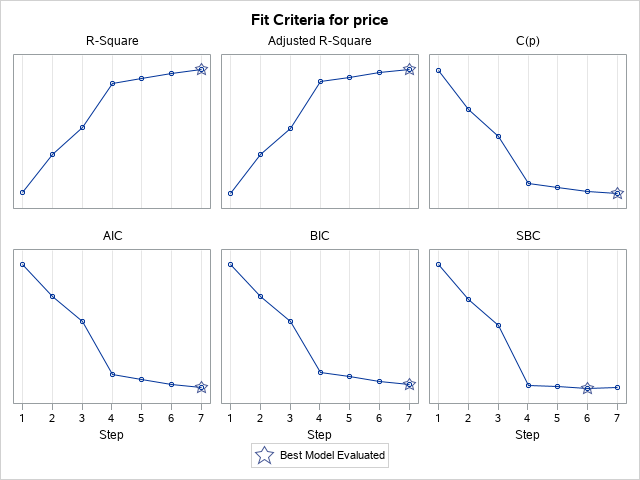
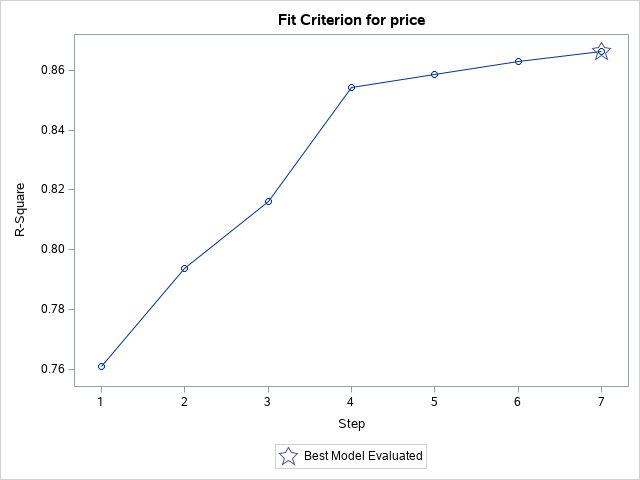
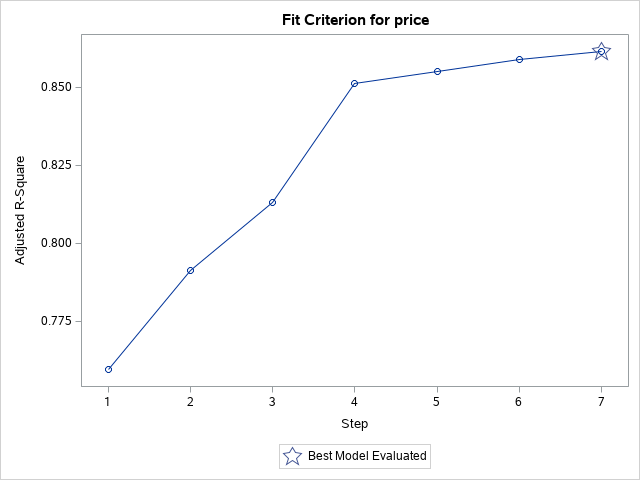
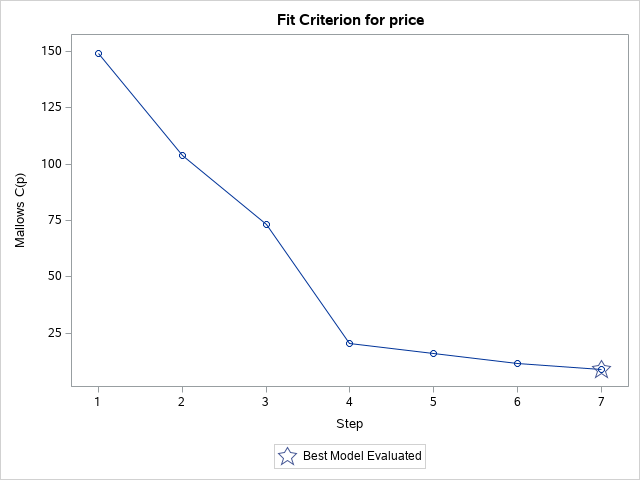
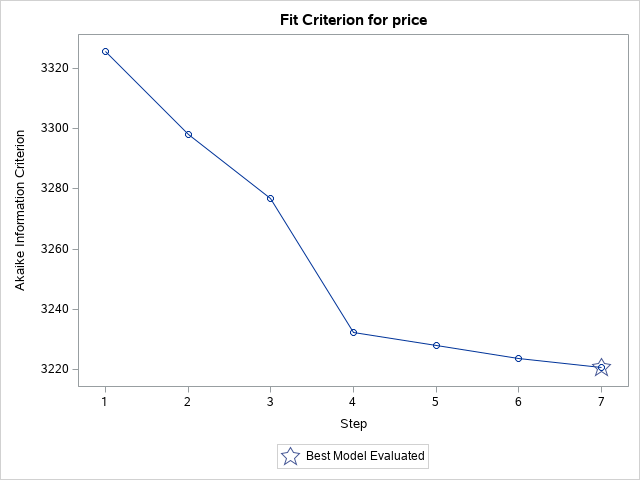
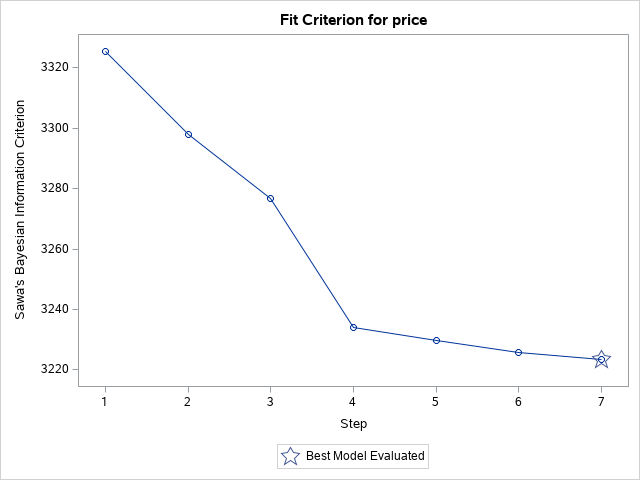
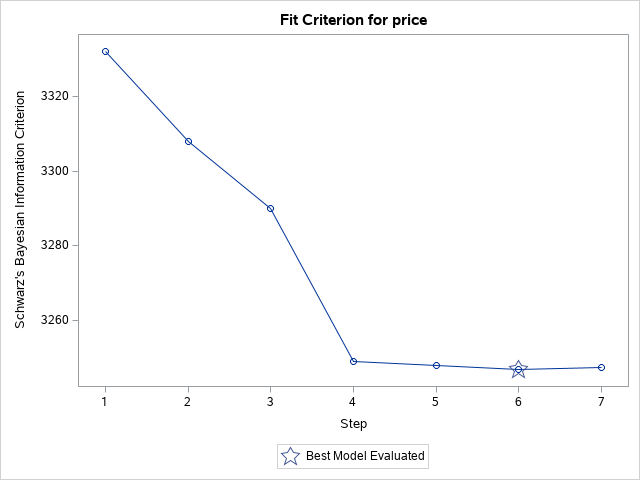
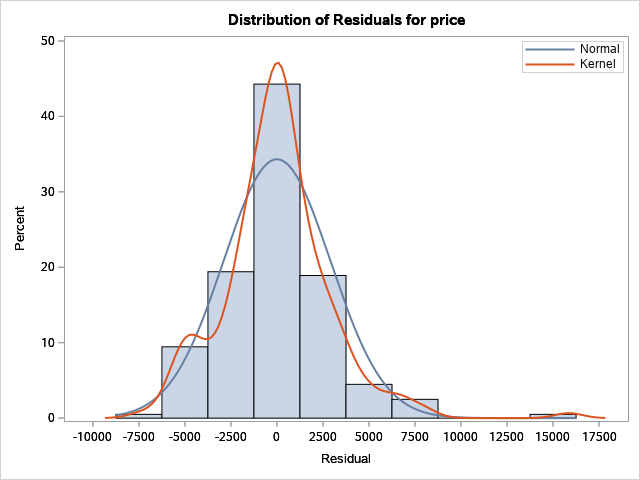
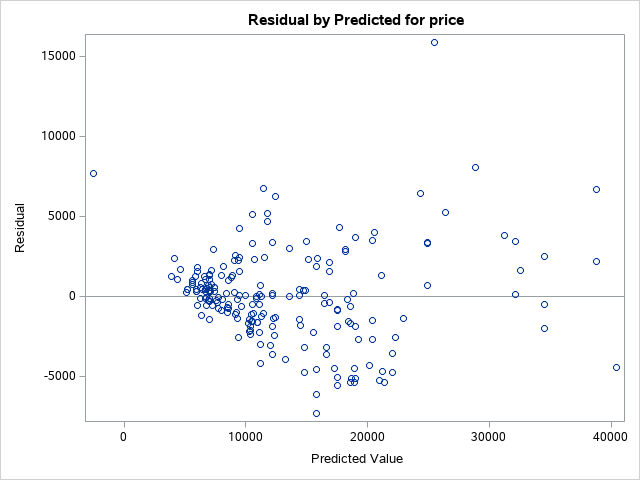
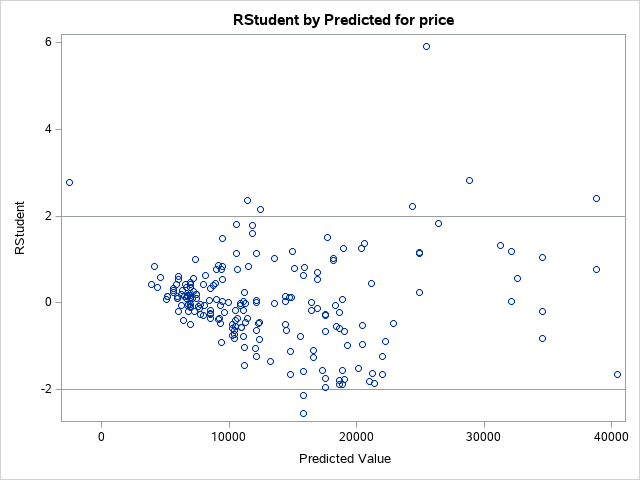
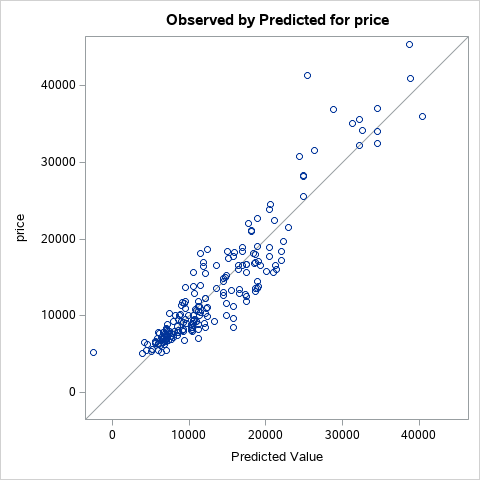
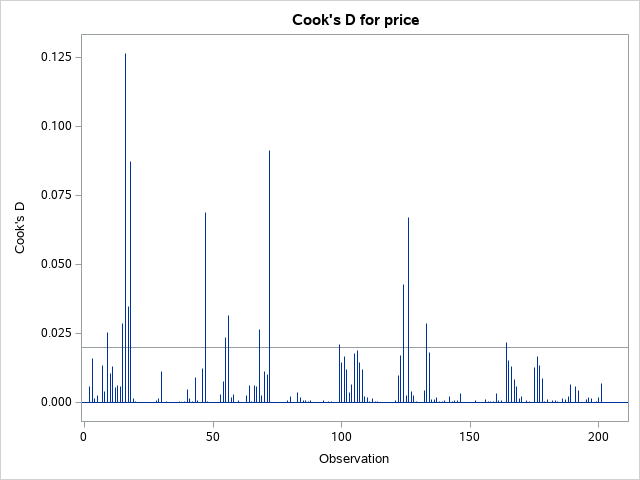
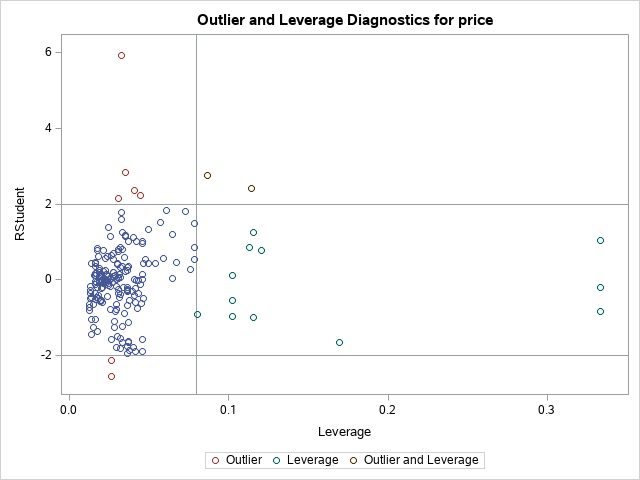
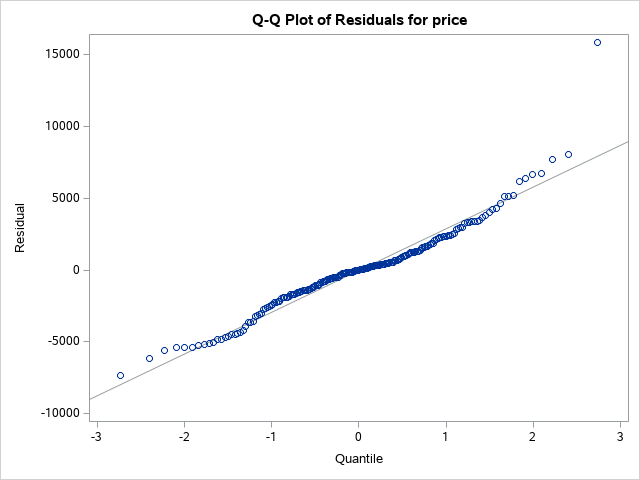
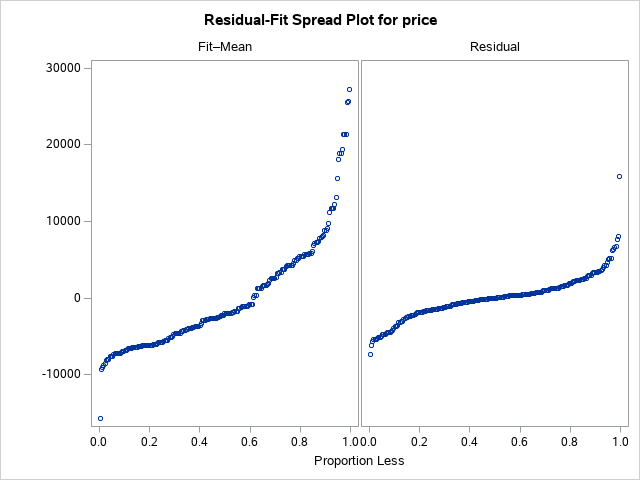
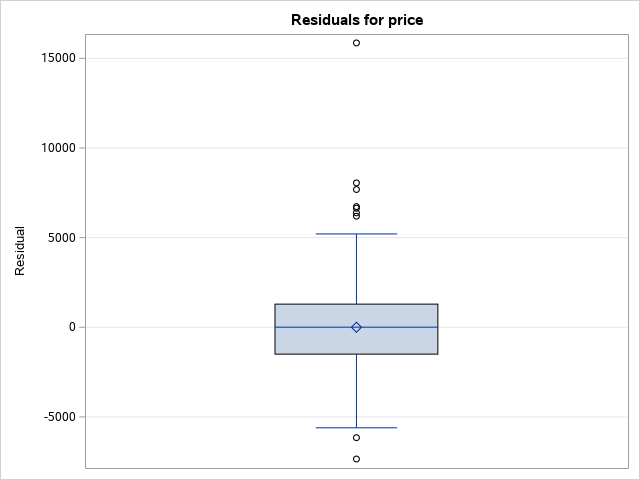
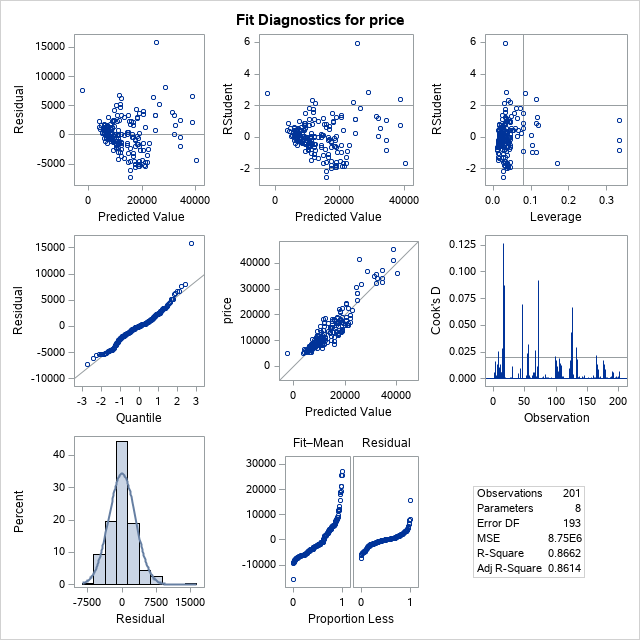
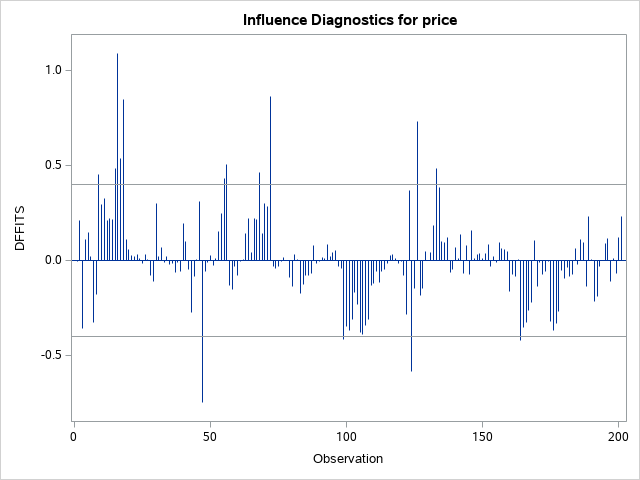
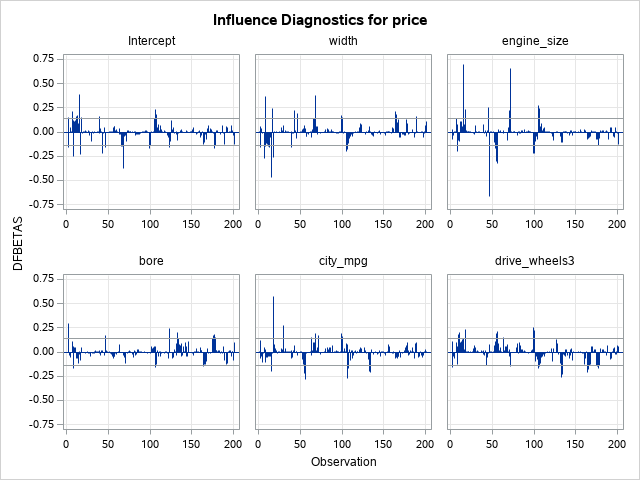
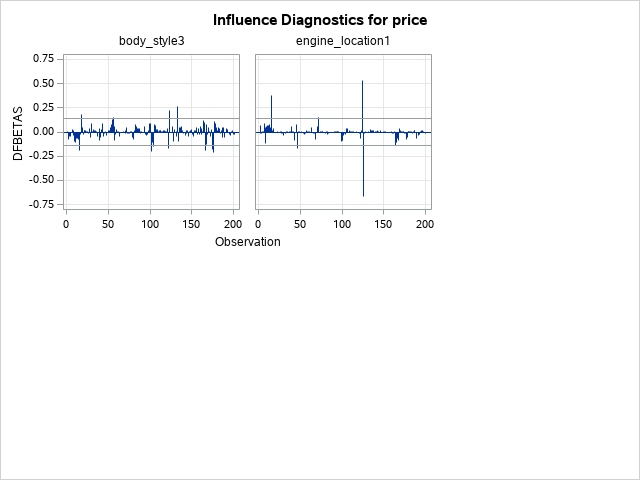
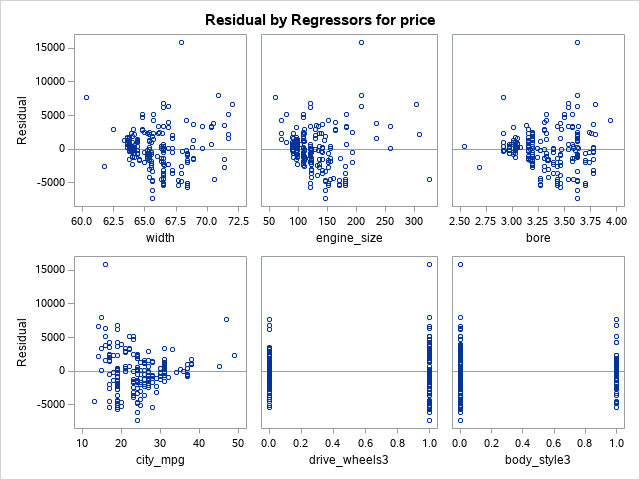
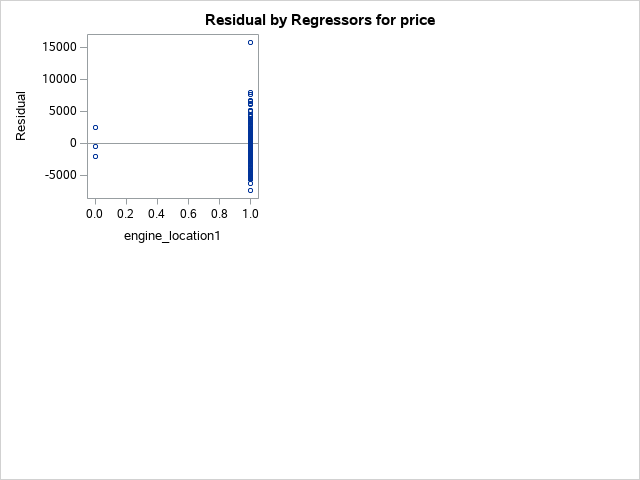

In [30]:
* Based on corr matrix we use the following variables for model;
Title 'Model Selection';
PROC reg data = auto5 plots = all;
model price = wheel_base length width curb_weight engine_size bore horsepower city_mpg highway_mpg drive_wheels2 drive_wheels3 body_style3 engine_location1 engine_location2 / Selection = Stepwise Details= All;
Run;
quit;


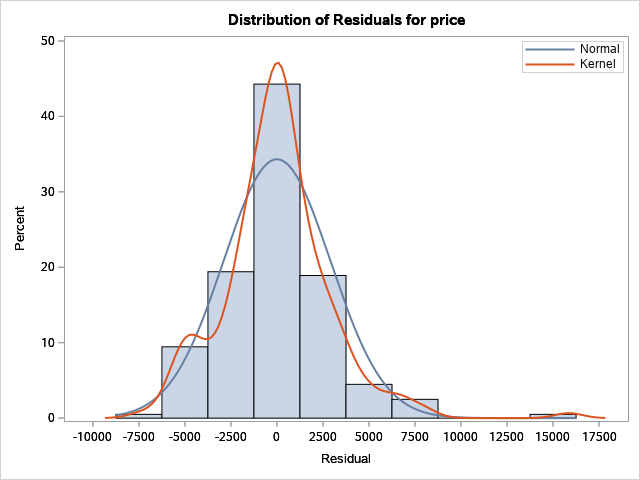
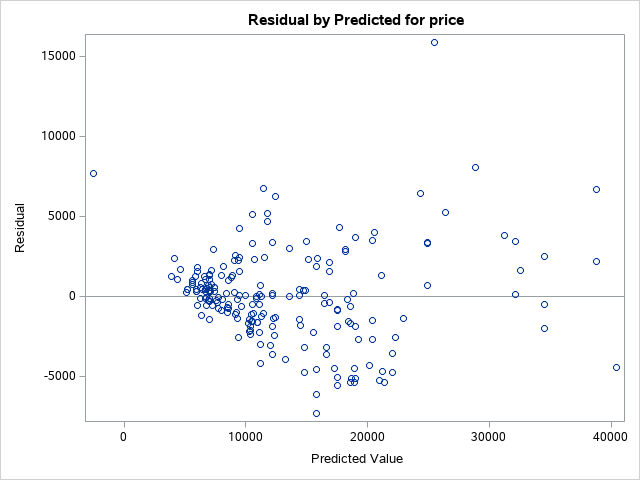
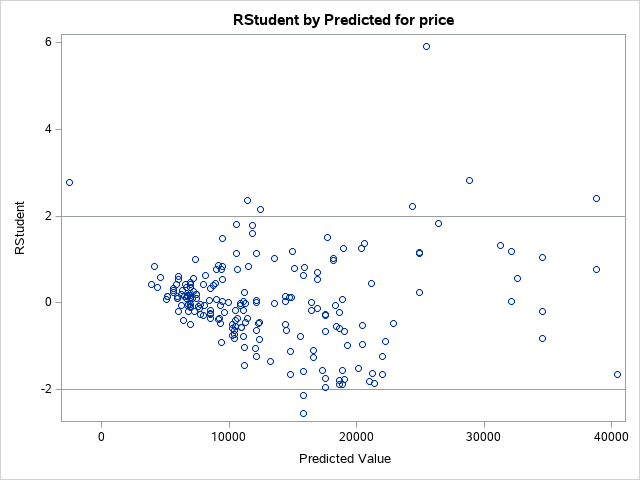
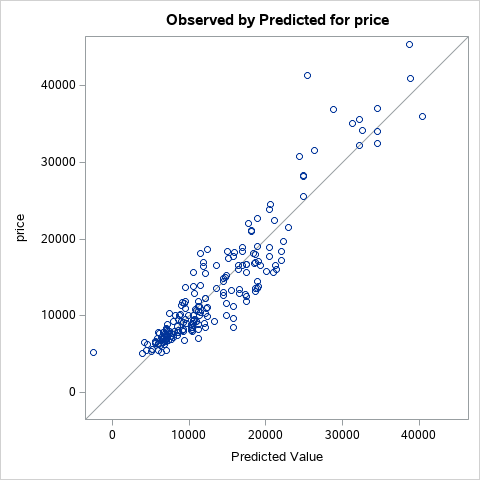
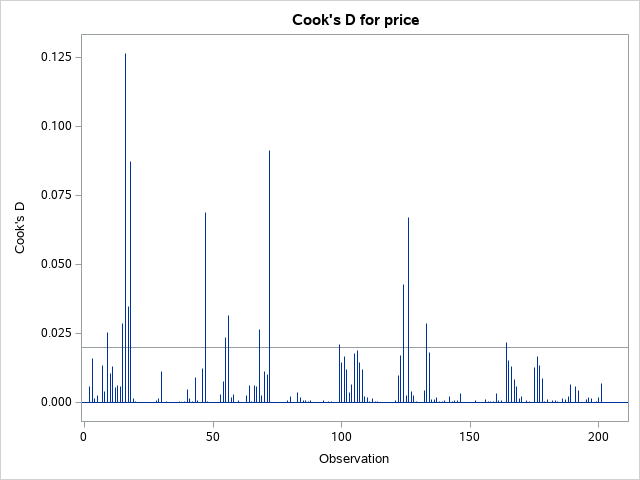
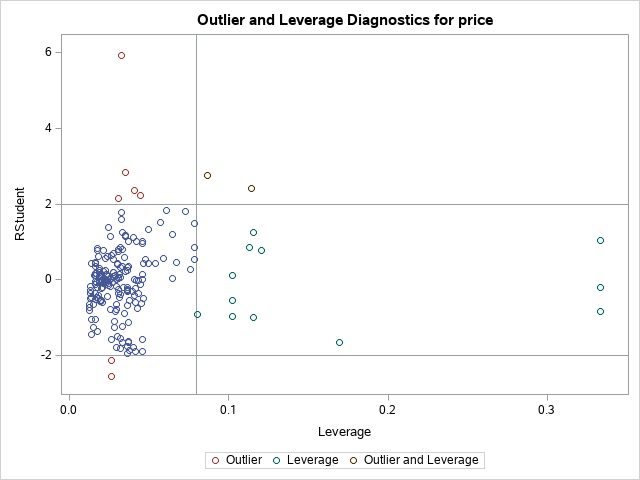
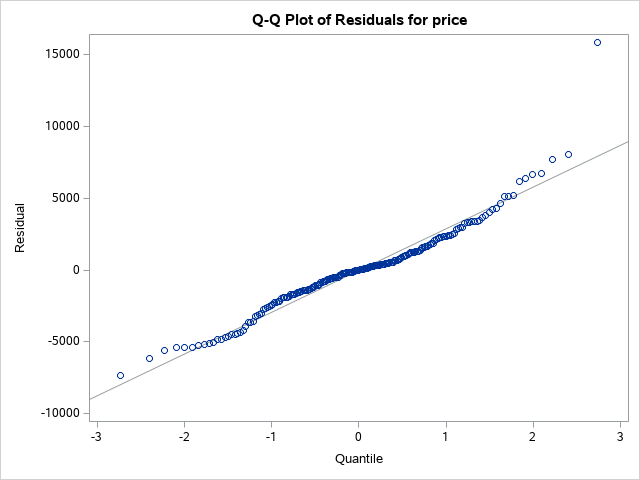
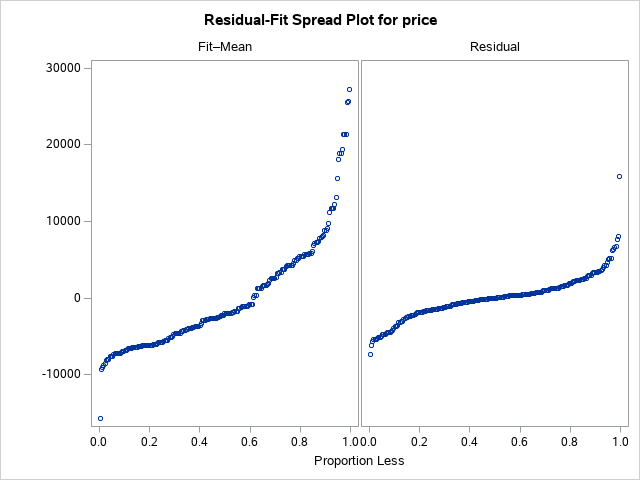
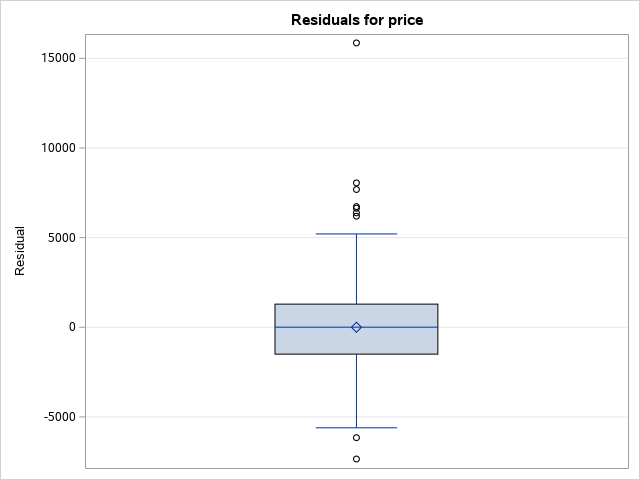
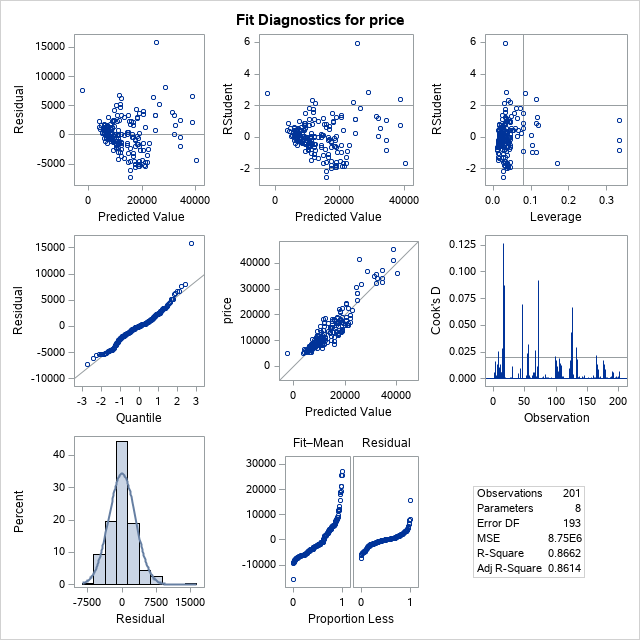
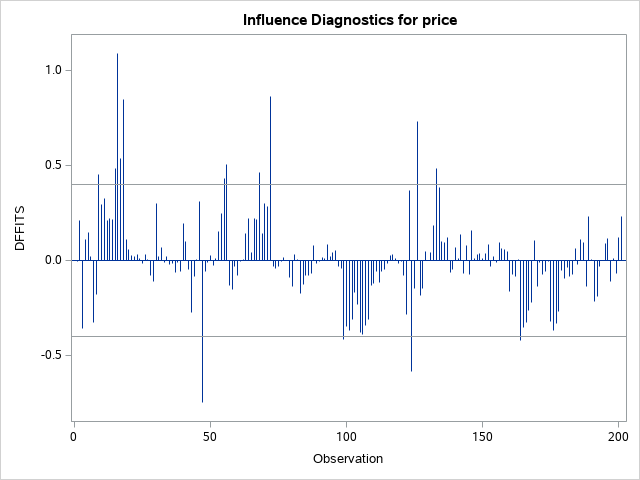
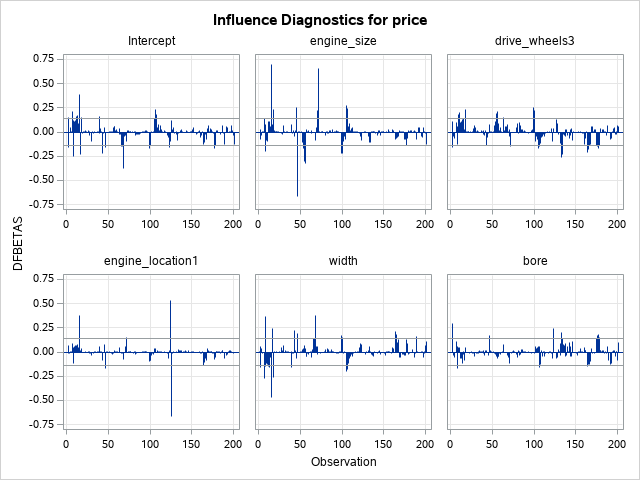
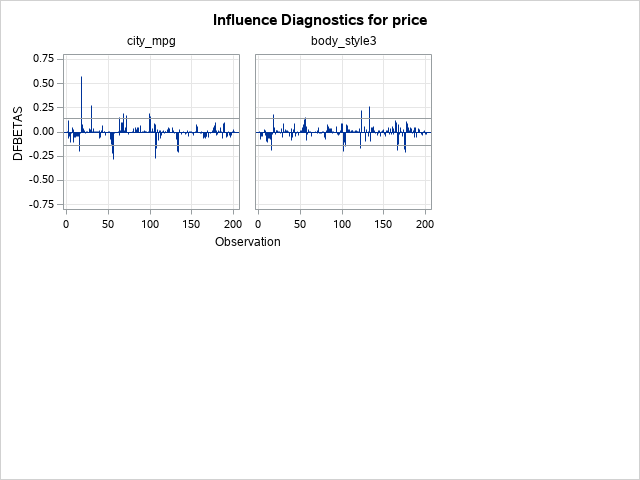
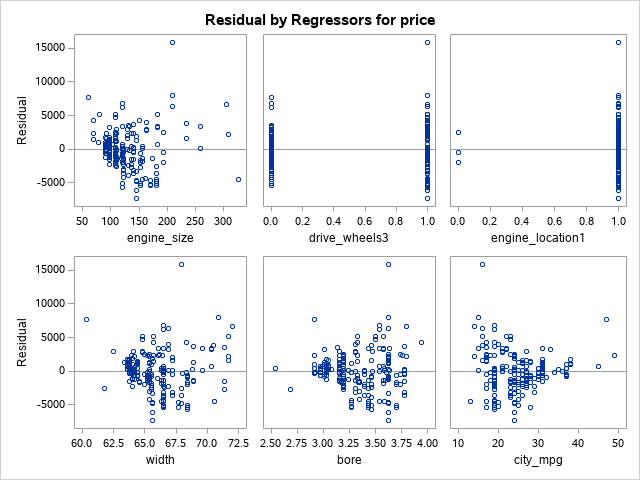
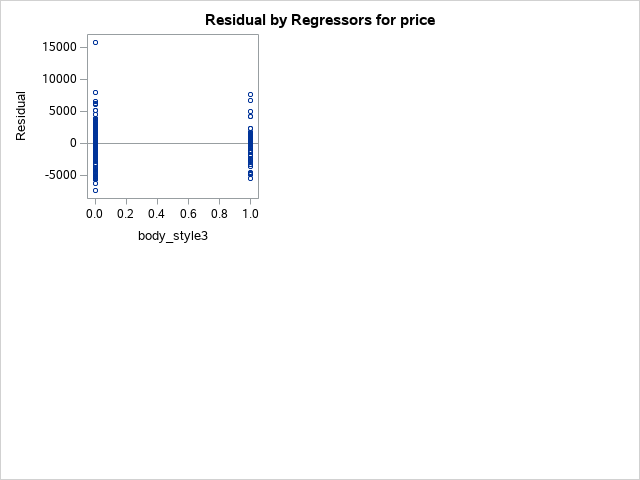

In [31]:
* Based on the model selection analysis our model should contain fpllowing predictors;
Title 'Best Model';
PROC reg data = auto5 plots = all;
model price = engine_size drive_wheels3 engine_location1 width bore city_mpg body_style3;
Run;
quit;


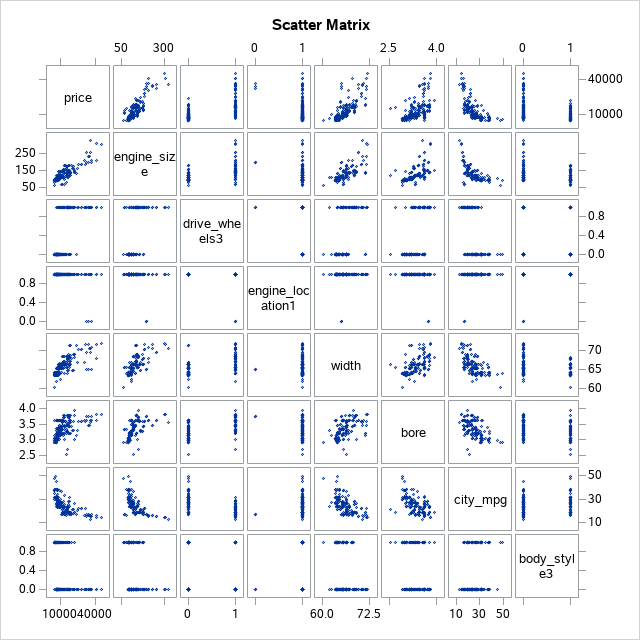

In [33]:
Title 'Scatter Matrix';
Proc sgscatter data = auto5;
matrix price engine_size drive_wheels3 engine_location1 width bore city_mpg body_style3;
run;
quit;